# 데이터 결합
* concat, join, merge
* 낮은 버전 append

In [1]:
import pandas as pd

pd.concat(objs, axis = 0, ignore_index = False)
* objs : concat을 실행할 객체의 리스트(DataFrame, Series, Panel object)
* axis : 0이면 열방향으로, 1이면 행방향으로 합침
* ignore_index : True이면 기존 index 무시하고 0부터 시작하는 정수로 재설정

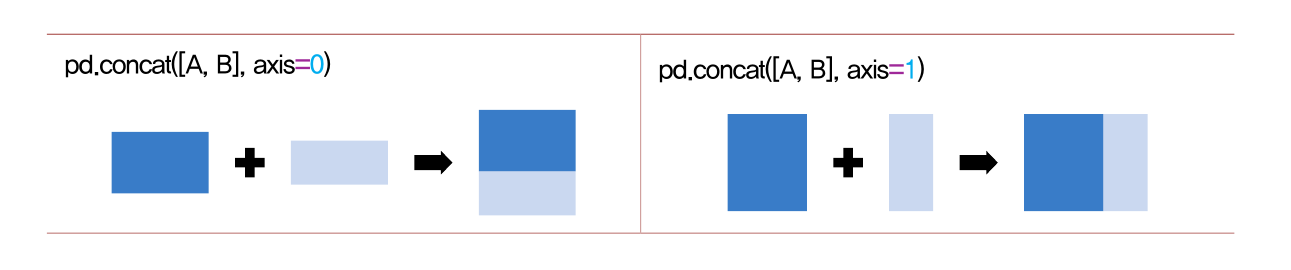

In [2]:
HR1 = pd.DataFrame({'이름':['장화','홍련'], 
                    '부서':['영업', '회계'], 
                    '직급':['팀장', '사원']})
HR1

,이름,부서,직급
0,장화,영업,팀장
1,홍련,회계,사원


In [3]:
HR2 = pd.DataFrame({'이름':['콩쥐','팥쥐'], 
                    '직급':['사원', '팀장'], 
                    '부서':['영업', '인사']})
HR2

,이름,직급,부서
0,콩쥐,사원,영업
1,팥쥐,팀장,인사


In [4]:
pd.concat([HR1, HR2], axis=0)

,이름,부서,직급
0,장화,영업,팀장
1,홍련,회계,사원
0,콩쥐,영업,사원
1,팥쥐,인사,팀장


In [18]:
pd.concat([HR1, HR2], axis=1)

,이름,부서,직급,이름,직급,부서
0,장화,영업,팀장,콩쥐,사원,영업
1,홍련,회계,사원,팥쥐,팀장,인사


In [5]:
pd.concat([HR1, HR2], axis=0, ignore_index=True)

,이름,부서,직급
0,장화,영업,팀장
1,홍련,회계,사원
2,콩쥐,영업,사원
3,팥쥐,인사,팀장


In [19]:
pd.concat([HR1, HR2], axis=1, ignore_index=True)

,0,1,2,3,4,5
0,장화,영업,팀장,콩쥐,사원,영업
1,홍련,회계,사원,팥쥐,팀장,인사


In [6]:
HR3 = pd.DataFrame({'이름':['콩쥐','팥쥐'], 
                    '부서':['영업', '인사'], 
                    '급여':[3500, 2800]})
HR3

,이름,부서,급여
0,콩쥐,영업,3500
1,팥쥐,인사,2800


* 겹치는 index는 합쳐서 만들고, 없는 index는 새로 만들되 NAN으로 생성

In [7]:
pd.concat([HR1, HR3], axis=0, ignore_index=True)

,이름,부서,직급,급여
0,장화,영업,팀장,NaN
1,홍련,회계,사원,NaN
2,콩쥐,영업,NaN,3500.0
3,팥쥐,인사,NaN,2800.0


In [20]:
pd.concat([HR1, HR3], axis=1, ignore_index=True)

,0,1,2,3,4,5
0,장화,영업,팀장,콩쥐,영업,3500
1,홍련,회계,사원,팥쥐,인사,2800


In [8]:
HR4 = pd.Series({1: 2500}, name='급여')
HR4

1    2500
Name: 급여, dtype: int64

In [21]:
pd.concat([HR1, HR4], axis=1)

,이름,부서,직급,급여
0,장화,영업,팀장,NaN
1,홍련,회계,사원,2500.0


In [10]:
HR5 = pd.DataFrame({'급여': [4500, 3000, 3500]})
HR5

,급여
0,4500
1,3000
2,3500


In [11]:
pd.concat([HR1, HR5], axis=1)

,이름,부서,직급,급여
0,장화,영업,팀장,4500
1,홍련,회계,사원,3000
2,NaN,NaN,NaN,3500


In [22]:
pd.concat([HR1, HR5], axis=0)

,이름,부서,직급,급여
0,장화,영업,팀장,NaN
1,홍련,회계,사원,NaN
0,NaN,NaN,NaN,4500.0
1,NaN,NaN,NaN,3000.0
2,NaN,NaN,NaN,3500.0


* join, merge는 연결한 두 데이터 프레임이 동시에 가지고 있는 특정한 컬럼의 값을 기준으로 두 개 이상의 데이터 프레임을 결합하여 하나의 프레임으로 만드는 것
* 두 데이터프레임이 동시에 가지고 있는 컬럼 : 컬럼명이 같다 x -> 컬럼이 가질수 있는 값의 집합인 도메인이 같다.
* 이 컬럼의 값을 key 라고 하며 이를 기준으로 1:1, 1:M, M:M 결합 가능

DataFrame.join(other, on = None, how = 'left', lsuffix = " , rsuffix = " , sort  = False )
* DataFrame : 결합의 기준이 되는 데이터 프레임으로 left DataFrame
* other : 결합의 대상이 되는 데이터 프레임으로 right DataFrame
* on : key 컬럼의 이름 (두 데이터 프레임에서 key 컬럼의 이름이 같아야 함)
* how : {left, right, inner, outer}. join 의 수행방식 선택
* lsuffix / rsuffix : 결합한 데이터프레임에서 왼쪽/오른쪽 데이터프레임의 컬럼명에 사용할 접미사
* sort : 키값을 기준으로 정렬할지 여부

DataFrame.merge(right, how = 'inner', on = None, left_on = None, right_on = None, 
                left_index = False, right_index = False, sort  = False, suffixes = ('_x','_y') )
* DataFrame : 결합의 기준이 되는 데이터 프레임으로 left DataFrame
* right : 결합의 대상이 되는 데이터 프레임으로 right DataFrame
* how : {left, right, inner, outer}. join 의 수행방식 선택
* on : key 컬럼의 이름 (두 데이터 프레임에서 key 컬럼의 이름이 같아야 함)
* left_on/right_on : 두 테이블에서 key 칼럼명이 다를 때, 'on'을 대신하여 각각 지정
* left_index/right_index : 왼쪽 혹은 오른쪽 데이터프레임의 인덱스를 key로 사용할 경우
* sort : 키값을 기준으로 정렬할지 여부
* suffixes : 결합한 데이터프레임에서 왼쪽/오른쪽 데이터프레임의 컬럼명에 사용할 접미사를 왼쪽-오른쪽 순서로 지정

In [23]:
product = pd.DataFrame({'상품코드':['G1', 'G2', 'G3', 'G4'], 
                        '상품명':['우유', '감자', '빵', '치킨']})
product

,상품코드,상품명
0,G1,우유
1,G2,감자
2,G3,빵
3,G4,치킨


In [13]:
sale = pd.DataFrame({'주문번호':[1001, 1002, 1002, 1003, 1004], 
                    '상품코드':['G4', 'G3', 'G1', 'G3', 'G5'], 
                    '주문수량':[1, 4, 2, 2, 3]})
sale

,주문번호,상품코드,주문수량
0,1001,G4,1
1,1002,G3,4
2,1002,G1,2
3,1003,G3,2
4,1004,G5,3


* inner join은 교집합
* key 컬럼의 값이 양쪽 데이터프레임에서 모두 존재하는 데이터에 대해서만 join 수행
* 어느 한쪽 데이터프레임에만 존재하는 key를 가지고 있는 행들은 버려지게 된다

In [26]:
#G5는 없어서 사라짐
# sort = False -> 기존 양식에 맞춰 순서가 나옴
sale.merge(product, on = '상품코드', how='inner')

,주문번호,상품코드,주문수량,상품명
0,1001,G4,1,치킨
1,1002,G3,4,빵
2,1003,G3,2,빵
3,1002,G1,2,우유


In [15]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주문번호    5 non-null      int64 
 1   상품코드    5 non-null      object
 2   주문수량    5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


* outer join은 합집합
* join을 수행하는 양쪽 데이터프레임에 있는 모든 데이터가 join에 사용되고 출력
* key 컬럼의 값이 양쪽 모두에 존재하는 데이터에 대한 join은 inner join과 같음
* key 컬럼의 값이 한쪽에만 존재하는 데이터는 NAN으로 채움

In [28]:
# G2가 product에 없지만 합집합이라서 나머지값 NAN으로 출력
# G5가 sale에 없어 상품명 NAN
# 순서는 sort = True 라서 상품코드 순서 맞춰서 G1, G2, G3 순서
sale.merge(product, on = '상품코드', how='outer', sort=True)

,주문번호,상품코드,주문수량,상품명
0,1002.0,G1,2.0,우유
1,NaN,G2,NaN,감자
2,1002.0,G3,4.0,빵
3,1003.0,G3,2.0,빵
4,1001.0,G4,1.0,치킨
5,1004.0,G5,3.0,NaN


* right join -> right outer join
* left join -> left outer join
* 양쪽 데이터프레임에서 하나가 기준이 되는 join 방식
* 기준이 되는 데이터프레임은 전체가 사용, but 대상이 되는 데이터프레임은 전체 데이터가 출력되지 않을 수 있다는 것이 특징
* 대상 프레임에 같은 key가 없다면 NAN  

In [33]:
# 여기서는 상품코드라는 같은 key를 지님
# sale의 상품코드 순서로 배치
sale.merge(product, left_on = '상품코드', right_on = '상품코드', how='left')

,주문번호,상품코드,주문수량,상품명
0,1001,G4,1,치킨
1,1002,G3,4,빵
2,1002,G1,2,우유
3,1003,G3,2,빵
4,1004,G5,3,NaN


In [34]:
# 여기서는 상품코드라는 같은 key를 지님
# product의 상품코드 순서로 배치
sale.merge(product, left_on = '상품코드', right_on = '상품코드', how='right')

,주문번호,상품코드,주문수량,상품명
0,1002.0,G1,2.0,우유
1,NaN,G2,NaN,감자
2,1002.0,G3,4.0,빵
3,1003.0,G3,2.0,빵
4,1001.0,G4,1.0,치킨


### left_on/right_on
* 양쪽 테이블의 key 칼럼명은 다르고 data 값은 같을 때, on 대신 사용

### left_index/right_index
* index를 key로 사용할 경우

### ref
https://kevinitcoding.tistory.com/entry/DataFrame-%EB%B3%91%ED%95%A9%ED%95%98%EA%B8%B0-concat-merge-join
